<h1>Stroke Risk Prediction Dataset Based on Symptoms</h1>

<h3>Context & Motivation</h3>

The motivation for this dataset is to predict the risk of stroke, one of the major cause of death and disability worldwide. The data includes various health and lifestyle factors, such as age, BMI, and smoking status, which are known to be associated with stroke risk. The context is to develop a predictive model that can help medical professionals and individuals assess their risk, allowing for proactive health management and preventative measures.

<h3>Problem Definition</h3>

The problem is to predict an individual's stroke risk percentage based on their health profile. This is a regression challenge, as the target variable (stroke risk) is a continuous numerical value. <br>The goal is to build a model that can accurately estimate this percentage, providing a quantitative risk assessment rather than a simple categorical outcome (e.g., "high risk" vs. "low risk").


<h3>Expected Social Impact</h3>

<h4>SDG 3: Good Health and Well-being</h4>

By developing an accurate stroke risk prediction model, the project can contribute to:

<ul>
<li>Preventative Healthcare: Identifying individuals at high risk allows for early intervention, lifestyle modifications, and medical management, potentially preventing strokes from occurring.

<li>Resource Optimization: Healthcare systems can allocate resources more effectively by focusing on high-risk populations, improving efficiency and access to care.

<li>Increased Health Awareness: The model can empower individuals to take a more active role in their health by understanding the impact of their lifestyle choices on stroke risk.
</ul>

------------------------

<h3>Import Library</h3>

In [1]:
#import libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

#import Functions_EDA.py to use their functions

from Functions_EDA import *

<h3>Import Database</h3>

<h4>Dataset Description</h4>

The "Stroke Risk Prediction Dataset" on Kaggle is a synthetic dataset meticulously created to serve as a tool for developing and evaluating machine learning models. It is not a collection of real patient data but is instead generated based on established medical literature, epidemiological studies, and clinical guidelines. 
<br>

<h5>Key Features and Design Principles:</h5>

<ul>
<li>Synthetic Nature: The data is artificially generated, which means the relationships between features and the target variable are intentionally modeled to reflect real-world medical knowledge. This allows for controlled experimentation and validation of model performance against known ground truth.

<li>Medical Validity: The dataset's structure is grounded in established risk factors for stroke. Key references from organizations like the World Health Organization (WHO) and the American Stroke Association (ASA) were used to create the data.

<li>stroke_risk_percentage (Target for this Challenge): A continuous value from 0-100%, representing the estimated percentage likelihood of a stroke. This is the target for a regression challenge.

<li>Feature Columns: The dataset is composed of various features, which are primarily binary indicators of symptoms and medical conditions:

Medical Conditions/Symptoms: high_blood_pressure, irregular_heartbeat, chest_pain, shortness_of_breath, fatigue_and_weakness, dizziness, swelling, pain_in_neck/jaw/shoulder/back, excessive_sweating, persistent_cough, nausea_and_vomiting, chest_discomfort_activity, cold_hands_and_feet, snoring_and_sleep_apnea, anxiety_and_feeling_of_doom.
</ul>


In [2]:
#Import Stroke Dataset
df_stroke = pd.read_csv("stroke_risk_dataset.csv")

#show Database
df_stroke.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


<h4>Drop Unecessary Features</h4>

In [3]:
#In order to build a Regression model, the target "At Risk" will be droped

df_stroke = df_stroke.drop(columns=["At Risk (Binary)"])

<h4>Check General Information</h4>

In [4]:
print(df_stroke.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

-----------------

<h3>Explorative Data Analysis</h3>

<h4>Identify Missing Values</h4>

In [5]:
#Check Missing values for df_drop:

print("\n df_stroke: ",count_na(df_stroke))


 df_stroke:  No missing Value


<h4>Duplicated Data</h4>

In [6]:
# check for duplicated data:

check_duplicated(df_stroke)

('Duplicate rows found:',
        Chest Pain  Shortness of Breath  Irregular Heartbeat  \
 15              0                    1                    0   
 26              1                    0                    0   
 65              0                    1                    0   
 120             1                    1                    0   
 128             1                    0                    1   
 ...           ...                  ...                  ...   
 69854           0                    1                    1   
 69877           1                    1                    1   
 69888           0                    0                    1   
 69940           1                    1                    0   
 69951           1                    1                    0   
 
        Fatigue & Weakness  Dizziness  Swelling (Edema)  \
 15                      1          1                 1   
 26                      1          0                 1   
 65                      0 

<p>Since this is a synthetic database, duplicated data could mean an error in the generation process and they will be deleted.

In [7]:
#Drop Dupplicated data:
df_stroke = df_stroke.drop_duplicates()

#check for duplicated data again
check_duplicated(df_stroke)

('No duplicate rows found.', None)

<h4>Outliers</h4>

<h5>Numerical Data</h5>

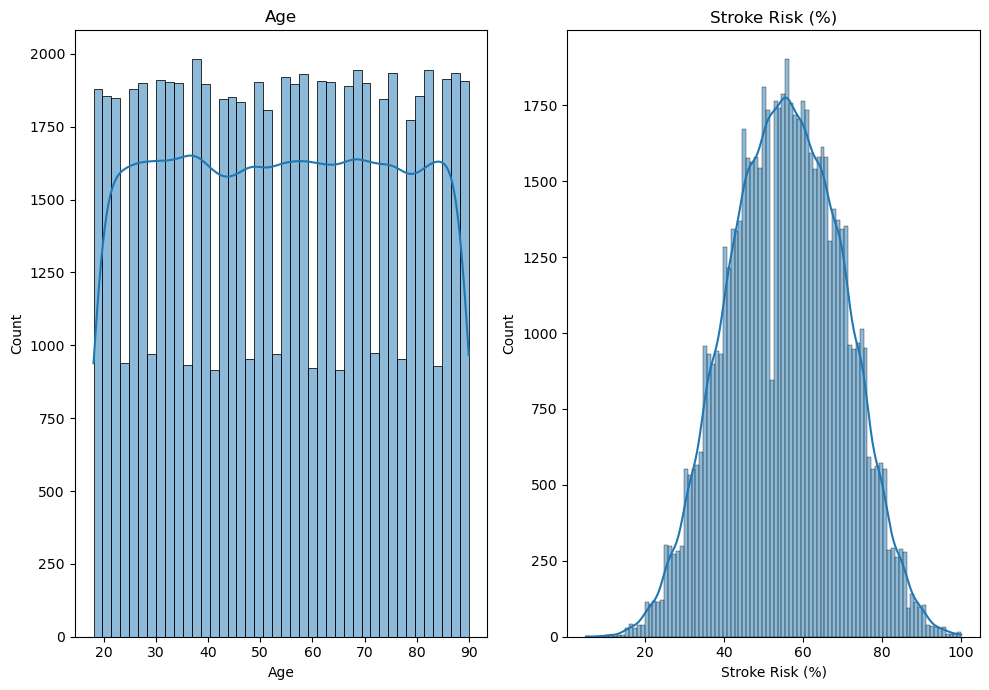

Column  Age  without outliers.
Column  Stroke Risk (%)  :  70  outliers from  5.0  to  100.0 . Mean:  58.93571428571428


In [8]:
#for df_performance

num_data = ["Age","Stroke Risk (%)"]

data_hist(df_stroke,num_data)

find_iqr_outliers(df_stroke,num_data)

<p>The Age distribution shows to be closed to an uniform distribution.
<p>The Stroke Risk are closed to a normal distribution.
<p>In this case, there is no need for adjustments.

<h5>Categorical Data as Numbers (Discrete Numerical Values)</h5>

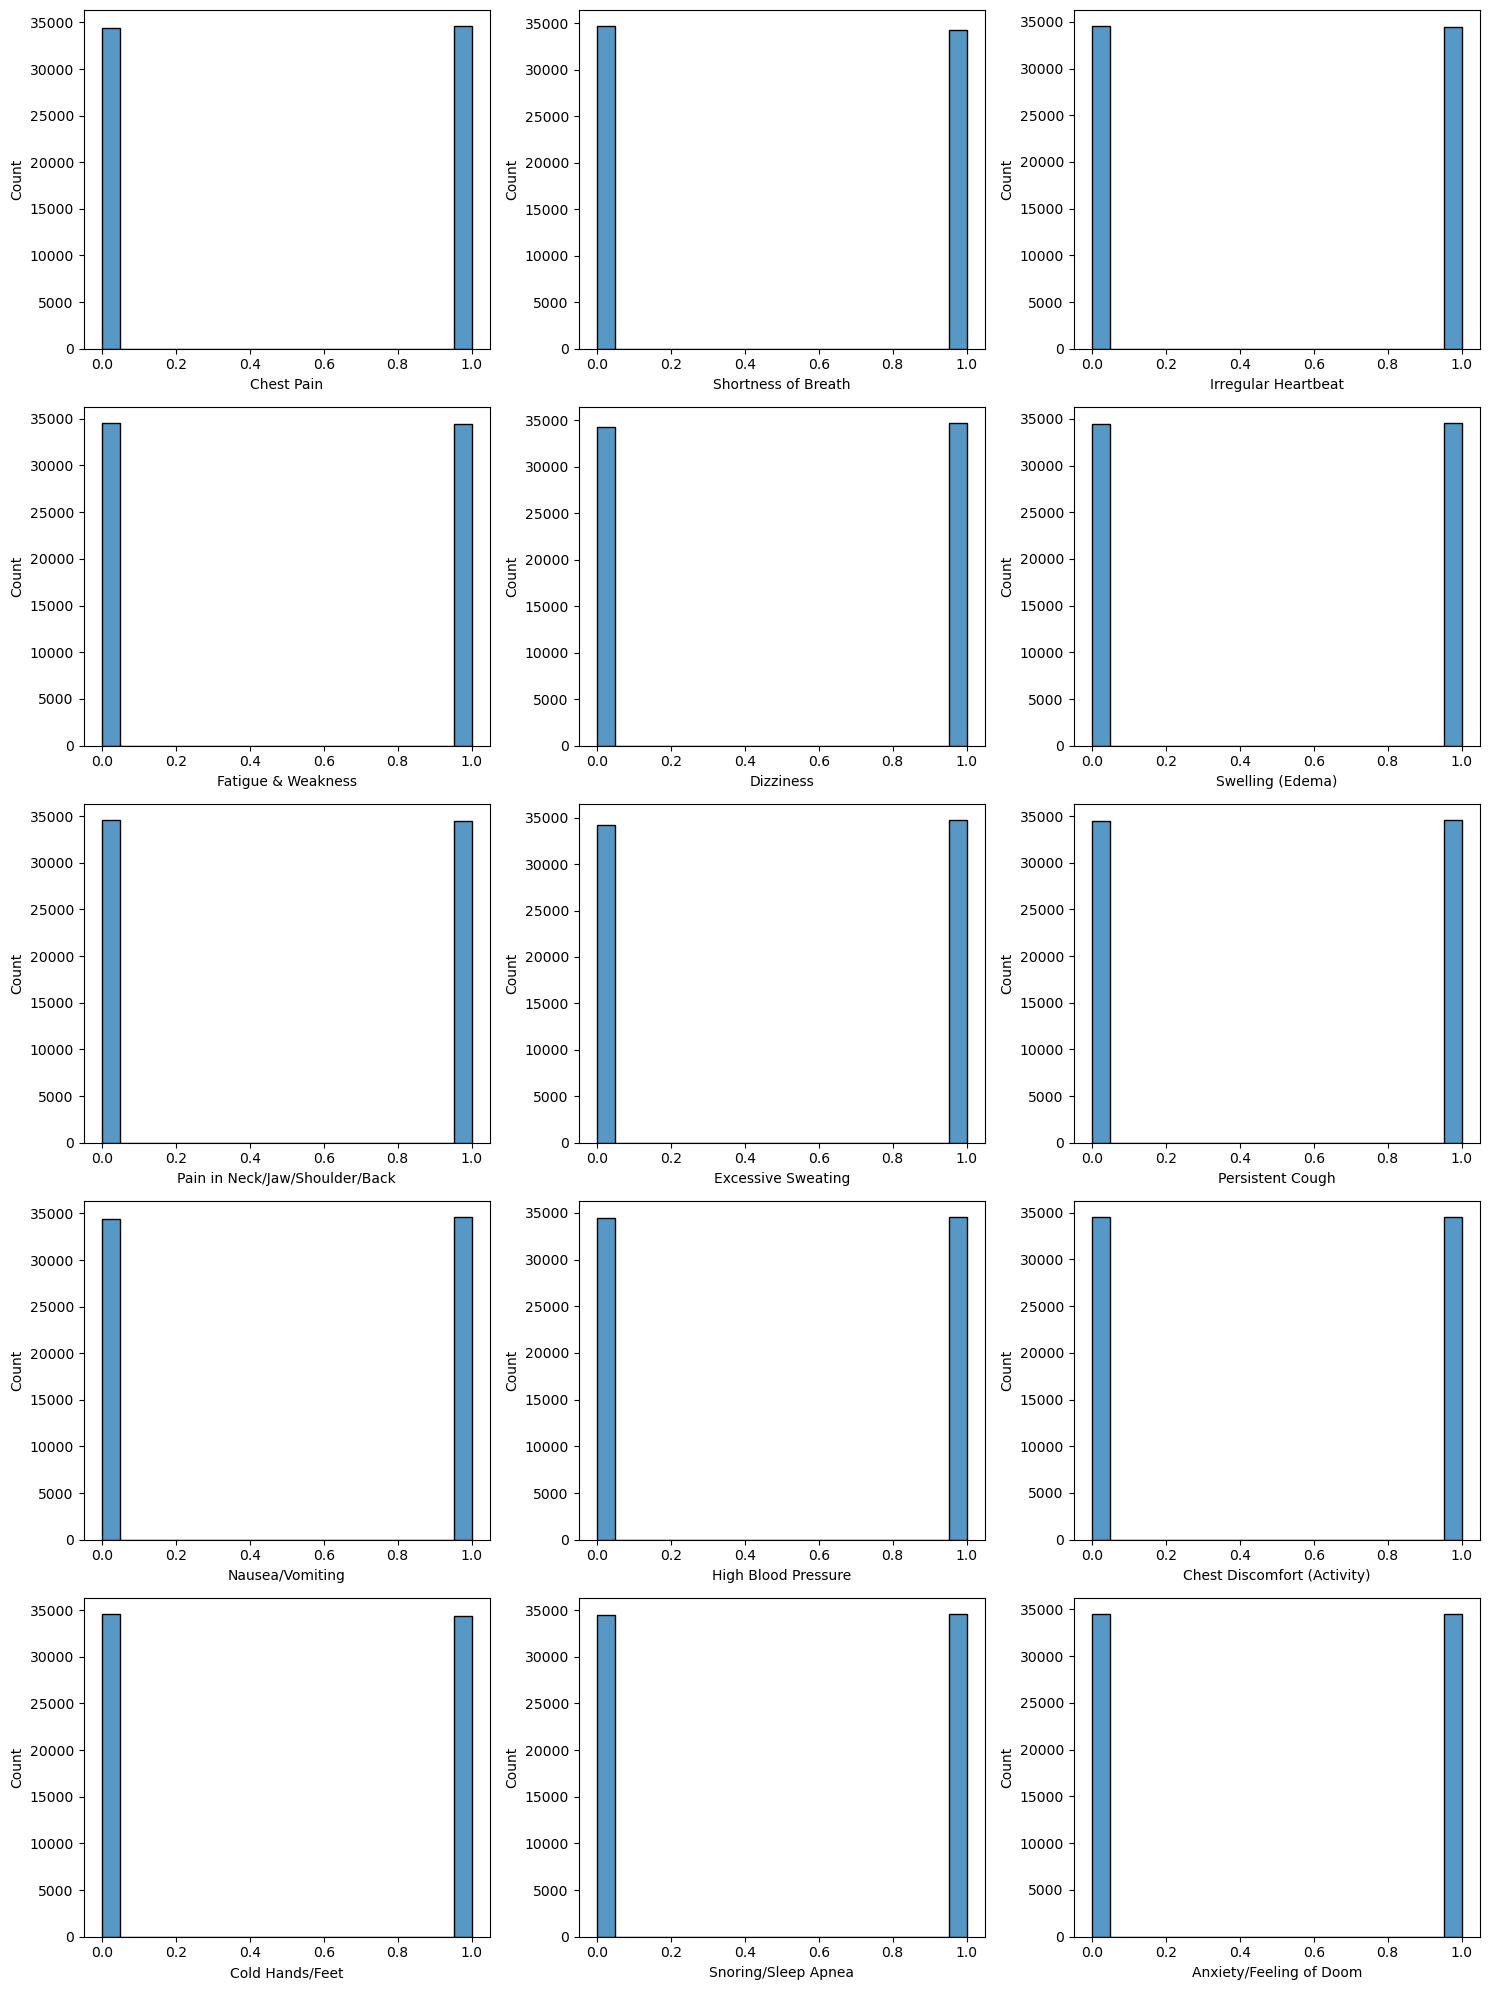

Chest Pain :
- 1:34598 (50.16%),
- 0:34381 (49.84%),
Shortness of Breath :
- 0:34716 (50.33%),
- 1:34263 (49.67%),
Irregular Heartbeat :
- 0:34553 (50.09%),
- 1:34426 (49.91%),
Fatigue & Weakness :
- 0:34513 (50.03%),
- 1:34466 (49.97%),
Dizziness :
- 1:34703 (50.31%),
- 0:34276 (49.69%),
Swelling (Edema) :
- 1:34537 (50.07%),
- 0:34442 (49.93%),
Pain in Neck/Jaw/Shoulder/Back :
- 0:34558 (50.10%),
- 1:34421 (49.90%),
Excessive Sweating :
- 1:34739 (50.36%),
- 0:34240 (49.64%),
Persistent Cough :
- 1:34558 (50.10%),
- 0:34421 (49.90%),
Nausea/Vomiting :
- 1:34604 (50.17%),
- 0:34375 (49.83%),
High Blood Pressure :
- 1:34539 (50.07%),
- 0:34440 (49.93%),
Chest Discomfort (Activity) :
- 0:34509 (50.03%),
- 1:34470 (49.97%),
Cold Hands/Feet :
- 0:34565 (50.11%),
- 1:34414 (49.89%),
Snoring/Sleep Apnea :
- 1:34558 (50.10%),
- 0:34421 (49.90%),
Anxiety/Feeling of Doom :
- 0:34496 (50.01%),
- 1:34483 (49.99%),


In [9]:
#check for frequency:

#list with categorical columns 
cat_data = [column for column in list(df_stroke.columns) if column not in num_data]

data_hist(df_stroke,cat_data)

#print frequency
frequency(df_stroke,cat_data)

<p>Since the expressions are balanced, there is no need for adjustments in this case.

<h4>Correlation</h4>

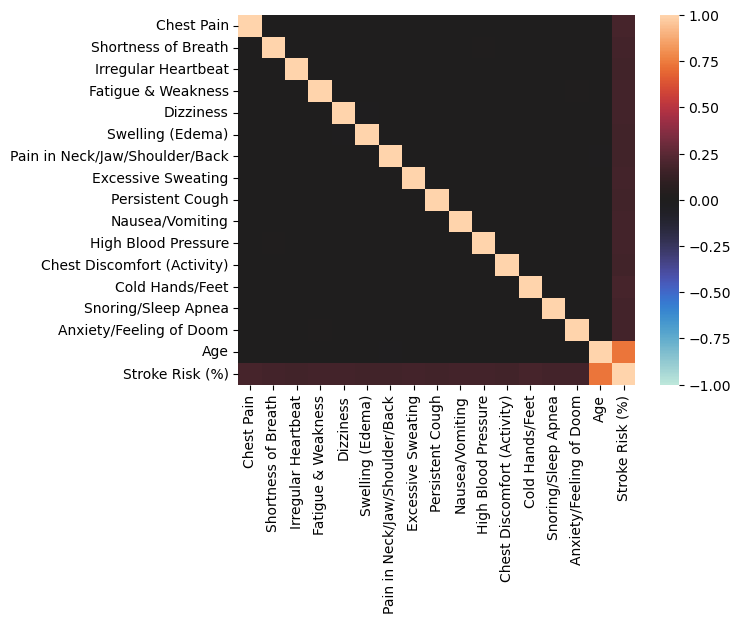

In [10]:
#using heatmap to check correlation:

corr_df = df_stroke.corr()

axis_corr = sns.heatmap(
    corr_df, vmin=-1, vmax=1, center=0
)

plt.show()

In [11]:
#Check for strong correlations, more than 0.7 (or less than -0.7)

strong_corr = corr_df[(corr_df > 0.7)|(corr_df < -0.7)]

for index, row_series in strong_corr.iterrows():

    correlated_columns = row_series[row_series.notna()]
    correlated_columns = correlated_columns[correlated_columns.index != index]

    if not correlated_columns.empty:
        print(f"Strong correlations for '{index}':")
        
        for correlated_col, value in correlated_columns.items():
            print(f"- '{correlated_col}' has a correlation of {value:.4f}")
        print("-" * 30)

Strong correlations for 'Age':
- 'Stroke Risk (%)' has a correlation of 0.7338
------------------------------
Strong correlations for 'Stroke Risk (%)':
- 'Age' has a correlation of 0.7338
------------------------------


<H2>Regession Models</h2>

<p>For this challenge I trained 3 models (Random Forest, Linear Regression and Decision Tree) to compare their performance and try to understand how different features influences different models.

In [12]:
#Prepare the data for training

#Define Features:

features_list = [column for column in list(df_stroke.columns) if column != "Stroke Risk (%)"]
X = df_stroke[features_list]

# Define your dependent variable (the target)
y = df_stroke['Stroke Risk (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<h3>Model 1: Random Forest</h3>

In [13]:
#create Random Forest Model and Train the data

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train,y_train)

#make predictions using rf_regressor
rf_predictions = rf_regressor.predict(X_test)


<h4>Understanding Feature Importance</h4>

In [14]:
#Check the impact of each feature in this model

importance = rf_regressor.feature_importances_
feature_names = X_test.columns

#formatting in Dataframe for readable output
df_importance = pd.DataFrame({
    'Features':feature_names,
    "Importance":importance
})
df_importance = df_importance.sort_values(by="Importance",ascending=False)

df_importance

,Features,Importance
15,Age,0.566272
10,High Blood Pressure,0.030225
0,Chest Pain,0.029809
13,Snoring/Sleep Apnea,0.029348
4,Dizziness,0.029169
14,Anxiety/Feeling of Doom,0.029084
3,Fatigue & Weakness,0.028996
1,Shortness of Breath,0.028903
11,Chest Discomfort (Activity),0.028891
6,Pain in Neck/Jaw/Shoulder/Back,0.028830


<h3>Model 2: Linear Regression</h3>

In [15]:
#Create Linear Regression Model and train the data

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

#Make predictions

lr_predictions = lr_model.predict(X_test)

<h5>Understanding Coefficients</h5>

In [16]:
#Check coefficients to understand how each feature influences the Linear Regression

coefficients = lr_model.coef_
feature_names = X_test.columns

#combine data in a dataset
df_coef= pd.DataFrame({"Feature":feature_names,"Coefficient":coefficients})

#Sort DF
df_coef = df_coef.sort_values(by="Coefficient",ascending=False)

df_coef

,Feature,Coefficient
2,Irregular Heartbeat,5.000145
11,Chest Discomfort (Activity),4.999818
6,Pain in Neck/Jaw/Shoulder/Back,4.999740
4,Dizziness,4.999720
0,Chest Pain,4.999719
10,High Blood Pressure,4.999719
13,Snoring/Sleep Apnea,4.999717
12,Cold Hands/Feet,4.999716
14,Anxiety/Feeling of Doom,4.999715
7,Excessive Sweating,4.999713


<p>The small coeficient for "Age" is due to different scale used for this feature. While other features are binary, Age is represented in a higher range.

<h3>Model 3: Decision Tree Regressor</h3>

In [17]:
#Create the model and train the data

dt_model = DecisionTreeRegressor(max_depth=12, random_state=42)
dt_model.fit(X_train,y_train)

#make predictions
dt_predictions = dt_model.predict(X_test)


<h4>Check Feature Importance</h4>

In [18]:
dt_importance = dt_model.feature_importances_
columns = X_test.columns

#transform it into DataFrame
dt_importance = pd.DataFrame({"Feature":columns,"Importance":dt_importance})

#sort
dt_importance = dt_importance.sort_values(by="Importance",ascending=False)

dt_importance

,Feature,Importance
15,Age,0.600145
0,Chest Pain,0.029575
3,Fatigue & Weakness,0.029147
1,Shortness of Breath,0.029143
10,High Blood Pressure,0.028630
6,Pain in Neck/Jaw/Shoulder/Back,0.027958
4,Dizziness,0.027173
11,Chest Discomfort (Activity),0.026893
2,Irregular Heartbeat,0.026505
8,Persistent Cough,0.026224


<h4>Evaluations</h4>
<p>To check performace, MSE, RMSE and R2 Score were used.
<p>In order to avoid unecessary features, Adjusted R2 Score was also included

In [19]:
evaluations("Random Forest Regressor",rf_predictions,X_test,y_test)

Evaluations for Random Forest Regressor: 
 mse = 7.197118597781966
 rmse = 2.682744601668591
 R2 Score = 0.9642955981485845
 Adjusted R2 = 0.9642541386500996


In [20]:
evaluations("Linear Regression",lr_predictions,X_test,y_test)

Evaluations for Linear Regression: 
 mse = 0.0023534155619137245
 rmse = 0.04851201461404921
 R2 Score = 0.9999883248700429
 Adjusted R2 = 0.99998831131303


<p>Here I accept the high performance of the Linear Regression model, not as a sign of overfitting, but as validation of the dataset's synthetic nature.
<p>The R2 of 0.99998 for Linear Regression on the test set is probably a consequence of the dataset being synthetically generated based on explicit linear statistical relationships found in the literature.
<p>Because of this, I decided to drop Linear Regression as optional model for this challenge.

In [21]:
evaluations("Decision Tree Regressor",dt_predictions,X_test,y_test)

Evaluations for Decision Tree Regressor: 
 mse = 42.115198563203684
 rmse = 6.489622374468617
 R2 Score = 0.7910694463175583
 Adjusted R2 = 0.7908268388091092


<p> Since adjusted R2 and R2 Score are very closed to each other, we can consider that all features are equally important to the model

<h4>Optimization</h4>

<h5>Random Forest</h5>

<p>To check the best combination of hyperparameters, I tested different combinations.

In [22]:
# --- Defining the Search Space (Hyperparameter Grid) ---

# Number of trees in the forest
n_estimators = [100, 300, 500, 800, 1000]

# Maximum number of levels (depth) in each tree
# Limiting depth prevents individual trees from overfitting
max_depth = [10, 20, 30, 40, None] #None for unlimited 

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Number of features to consider when looking for the best split
max_features = [1.0, 'sqrt', 'log2'] # 1.0 means use all features

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': [True, False] # Method of sampling data points (bootstrap vs. paste)
}

# --- Implement Randomized Search Cross-Validation ---
# Use the unoptimized Random Forest as the base estimator
rf_base = RandomForestRegressor(random_state=42)

# Instantiate the Random Search model
# n_iter: number of parameter settings that are sampled (tune this based on computation budget)
# cv: number of folds for cross-validation
# scoring: maximize the R2 score
rf_random = RandomizedSearchCV(
    estimator = rf_base,
    param_distributions = random_grid,
    n_iter = 20, # Number of different combinations to try
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = 4,
    scoring = 'r2'
)

# --- Fit the Random Search to the Training Data ---
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=True, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=True, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=True, max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.4s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.5s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; to

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.5s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': [1.0, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   random_state=42, scoring='r2', verbose=2)

In [23]:
#Get the best model:
best_rf_model = rf_random.best_estimator_
print(f"Best Parameters: {best_rf_model.get_params()}")


Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [24]:
#Evaluate the model with the best hyperparameters found

rf_predictions_best = best_rf_model.predict(X_test)
evaluations("Best Model Random Forest", rf_predictions_best,X_test,y_test)

Evaluations for Best Model Random Forest: 
 mse = 5.320375284088428
 rmse = 2.3065938706431237
 R2 Score = 0.973605990430396
 Adjusted R2 = 0.9735753420413173


<p>The average absolute error was reduced by 1.88 percentage points.
<p>The optimized model explains an additional 0.93% of the variance in the target variable.

<h5>Decision Tree</h5>

In [25]:
# --- Defining the Search Space (Hyperparameter Grid) for Decision Tree ---

# Maximum number of levels (depth) in the tree
# The most crucial parameter for controlling model complexity
max_depth = [5, 10, 15, 20, 30, None] # None means unlimited depth

# Minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4, 8]

# Number of features to consider when looking for the best split
# This is usually more important in Random Forests, but can be tested here.
max_features = [1.0, 'sqrt', 'log2', None] # None means use all features (equivalent to 1.0)

# Function to measure the quality of a split
# For DecisionTreeRegressor, 'mse' (Mean Squared Error) is now 'squared_error'
# 'friedman_mse' is an alternative
criterion = ['squared_error', 'friedman_mse', 'absolute_error'] 

# Create the random grid
random_grid_dt = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'criterion': criterion
}

# Use the unoptimized Decision Tree as the base estimator
dt_base = DecisionTreeRegressor(random_state=42)

# Instantiate the Random Search model
# The parameters (n_iter, cv, etc.) control the tuning process itself.
dt_random = RandomizedSearchCV(
    estimator = dt_base, # Change to DecisionTreeRegressor
    param_distributions = random_grid_dt, # Change to the new grid
    n_iter = 20, # Number of different combinations to try (tune this)
    cv = 5, # Number of folds for cross-validation
    verbose = 2,
    random_state = 42,
    n_jobs = 4,
    scoring = 'r2' # Maximizing the R2 score
)

# --- Fit the Random Search to the Training Data ---
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.1s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.1s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=friedman_mse, max_dep

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 10, 15, 20, 30, None],
                                        'max_features': [1.0, 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='r2', verbose=2)

In [26]:
#Get the best model:
best_dt_model = dt_random.best_estimator_
print(f"Best Parameters: {best_dt_model.get_params()}")

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [27]:
#Evaluate the model with the best hyperparameters found

dt_predictions_best = best_dt_model.predict(X_test)
evaluations("Best Model Decision Tree", dt_predictions_best,X_test,y_test)

Evaluations for Best Model Decision Tree: 
 mse = 34.773354258279376
 rmse = 5.89689361090052
 R2 Score = 0.8274918222770611
 Adjusted R2 = 0.827291507969523


<p>Using hyperparameters MSE dropped by over 17%
<p>The R2 Score was improved in 4.5%

<h3>Cross Validation</h3>

In [31]:
#Using cross validation to calculate accuracy from improved random forest model

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(best_rf_model, X, y, cv=kf, scoring="neg_mean_squared_error")
print("Cross-Validation Results (MSE):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {-result}")
    
print(f'Mean Accuracy: {-cross_val_results.mean()}')

Cross-Validation Results (MSE):
  Fold 1: 5.320375284088427
  Fold 2: 5.55851796011643
  Fold 3: 5.6869191718926135
  Fold 4: 5.708617645749017
  Fold 5: 5.335372980926061
Mean Accuracy: 5.52196060855451


In [ ]:
#using coss validation to calculate accuracy from improved decision tree model

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(best_dt_model, X, y, cv=kf, scoring="neg_mean_squared_error")
print("Cross-Validation Results (MSE):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {-result}")
    
print(f'Mean Accuracy: {-cross_val_results.mean()}')

Cross-Validation Results (MSE):
  Fold 1: 34.773354258279376
  Fold 2: 34.46123989743404
  Fold 3: 34.53693121597242
  Fold 4: 35.21884614300441
  Fold 5: 34.3149301780033
Mean Accuracy: 34.66106033853871


<p>The Cross Validation shows a similar accuracy for all folds, showing that the models can perform in different seccion from the data.